In [1]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
%matplotlib inline
import matplotlib.pyplot as plt

# RBM Network

In [2]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


In [3]:
x_train = x_train / 255.0

n, x, y = x_train.shape
x_train = x_train.reshape((n, x * y))
print(x_train.shape)

(60000, 784)


In [4]:
rbm = BernoulliRBM(n_components=128, learning_rate=0.02, batch_size=128, n_iter=50, random_state=0, verbose=True)

In [5]:
%%time
rbm.fit(x_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -280.82, time = 2.76s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -267.36, time = 3.97s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -260.76, time = 4.05s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -256.98, time = 3.98s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -252.89, time = 3.98s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -249.86, time = 3.94s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -245.39, time = 4.08s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -242.41, time = 3.84s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -240.11, time = 3.85s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -237.38, time = 3.88s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -234.03, time = 3.94s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -231.14, time = 3.86s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -228.43, time = 3.91s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -227.03, time = 3.91s
[BernoulliRBM] 

BernoulliRBM(batch_size=128, learning_rate=0.02, n_components=128, n_iter=50,
             random_state=0, verbose=True)

In [6]:
rbm.components_.shape 

(128, 784)

## Visualization

In [8]:
def plot_imgs(data, title):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(data):
        plt.subplot(8, 8, i + 1)
        plt.imshow(img.reshape((28, 28)), cmap=plt.get_cmap('gray'))
        plt.xticks(())
        plt.yticks(())

    plt.suptitle(title)
    plt.show()

### Original data

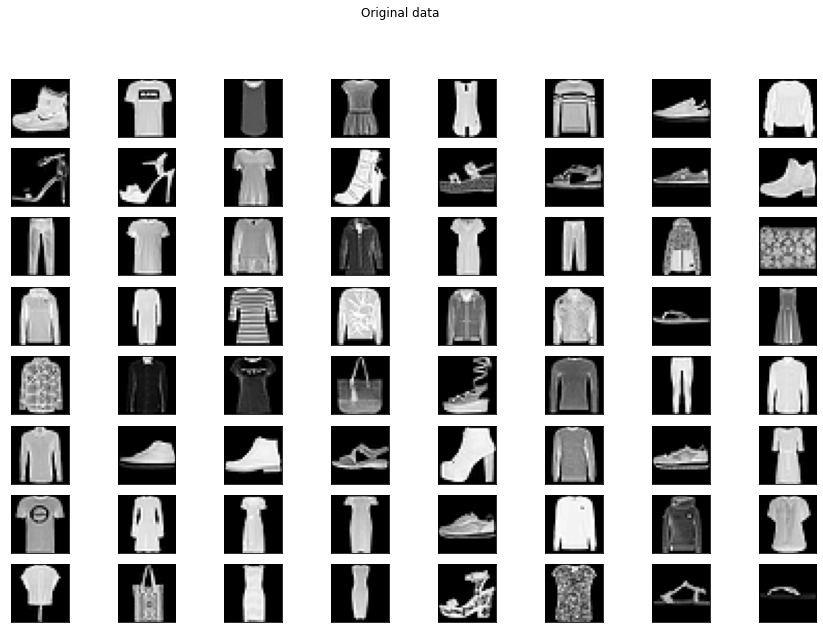

In [8]:
plot_imgs(x_train[:64], 'Original data')

### Components

ValueError: num must be 1 <= num <= 64, not 65

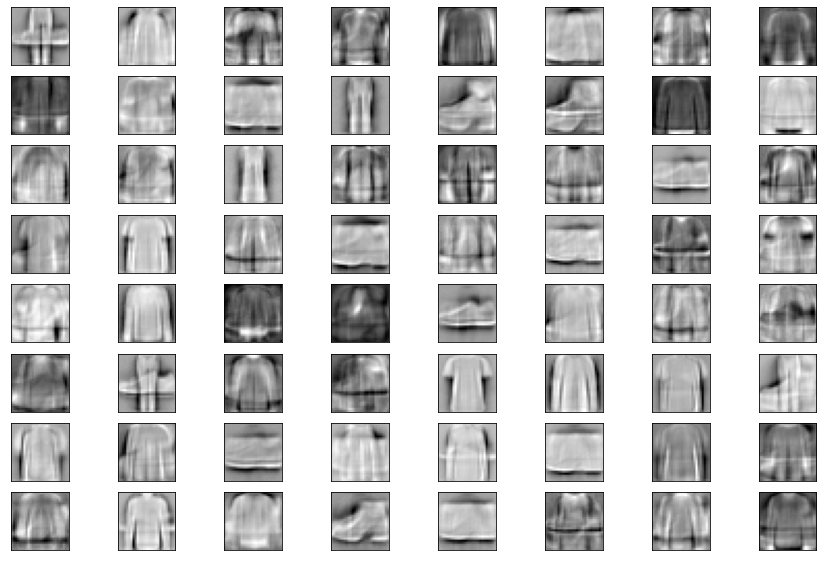

In [10]:
plot_imgs(rbm.components_, 'RBM Components')

## Reconstruction 

In [11]:
def iterate_gibbs(n, data, rbm):
    gibbs_data = data.copy()
    
    for i in range(n):
        gibbs_data = rbm.gibbs(gibbs_data).astype(float)
    
    return gibbs_data

In [12]:
gen_x = iterate_gibbs(1, x_train[:64], rbm)

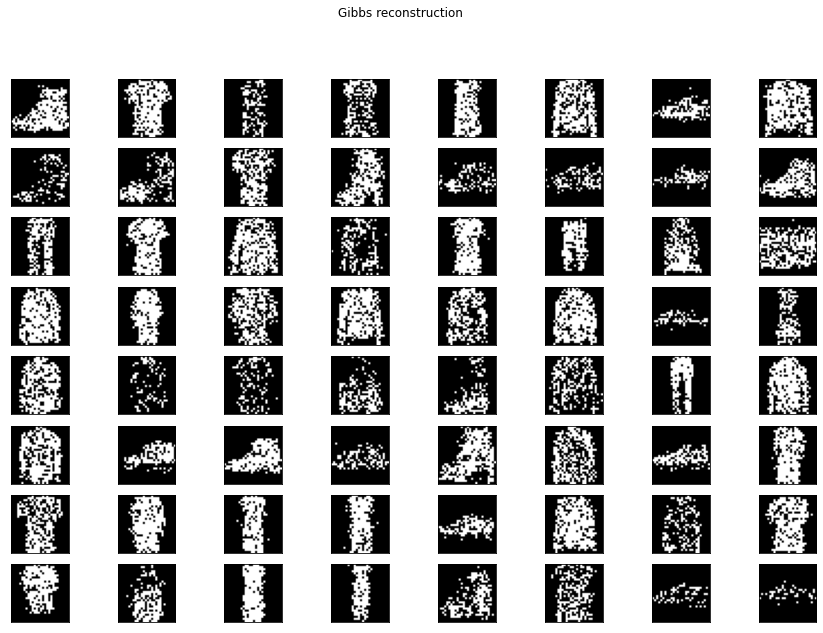

In [13]:
plot_imgs(gen_x, 'Gibbs reconstruction')

## Generating

In [15]:
n_samples = np.random.random_sample((128, 784))

ValueError: num must be 1 <= num <= 64, not 65

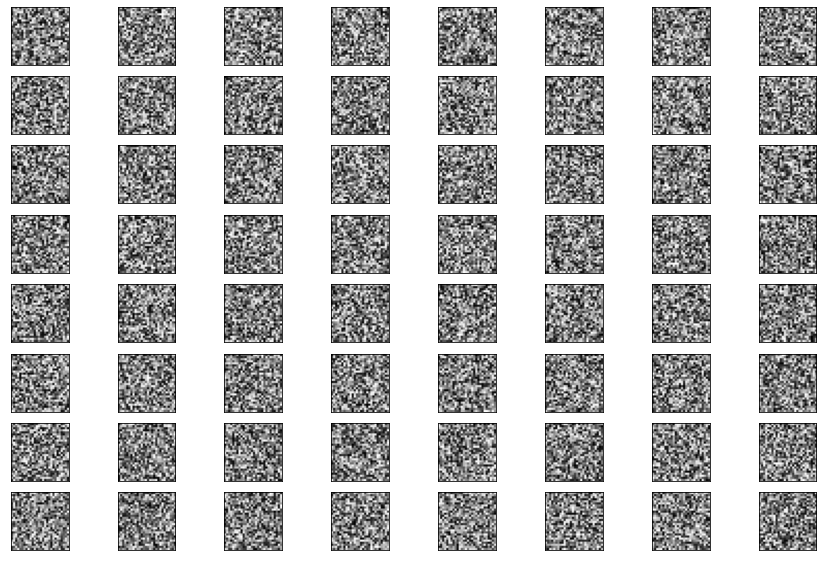

In [16]:
plot_imgs(n_samples, 'Generated noise')

In [17]:
gen_nsamples = iterate_gibbs(1000, n_samples, rbm)

ValueError: num must be 1 <= num <= 64, not 65

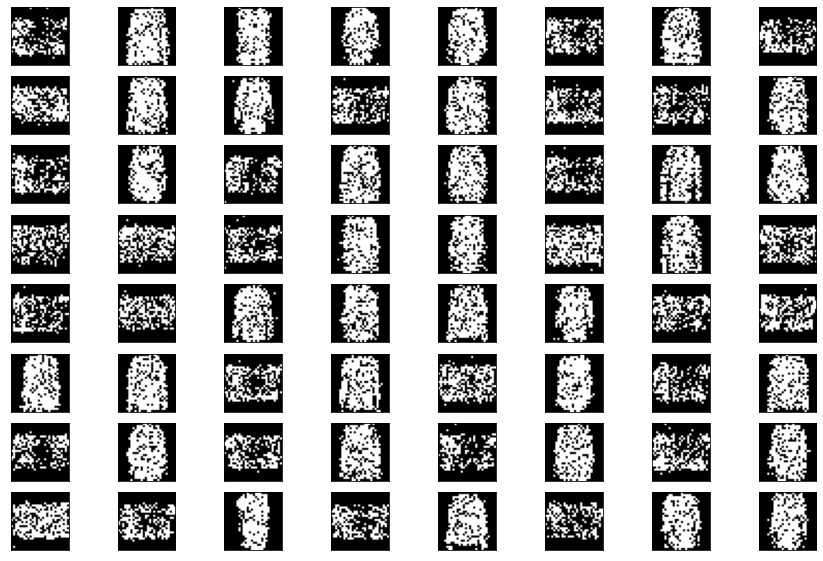

In [18]:
plot_imgs(gen_nsamples, 'Generated images')

# DBN Network classification

MNIST Fashion classification using stacked RBM

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [51]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [52]:
x_train = x_train / 255.0
x_test = x_test / 255.0

n, x, y = x_train.shape
x_train = x_train.reshape((n, x * y))
print(x_train.shape)

n, x, y = x_test.shape
x_test = x_test.reshape((n, x * y))
print(x_test.shape)

(60000, 784)
(10000, 784)


**DBN Model**

In [105]:
rbm = BernoulliRBM(n_components=140, learning_rate=0.02, batch_size=128, n_iter=50, verbose=True)

In [106]:
lg = LogisticRegression(C=10, multi_class='multinomial', solver='lbfgs', max_iter=1000, verbose=True)

In [107]:
model = Pipeline(steps=[('rbm', clone(rbm)), ('rbm2', clone(rbm)), ('clf', lg)])

In [108]:
model.fit(x_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -279.36, time = 3.80s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -266.24, time = 4.93s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -259.41, time = 5.03s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -255.47, time = 5.17s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -249.00, time = 4.92s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -248.18, time = 4.95s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -246.05, time = 5.59s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -240.34, time = 5.04s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -237.60, time = 5.38s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -234.13, time = 5.94s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -231.11, time = 5.35s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -230.06, time = 6.61s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -224.87, time = 5.26s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -223.80, time = 5.31s
[BernoulliRBM] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Konrad Ulman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished


Pipeline(steps=[('rbm',
                 BernoulliRBM(batch_size=128, learning_rate=0.02,
                              n_components=140, n_iter=50, verbose=True)),
                ('rbm2',
                 BernoulliRBM(batch_size=128, learning_rate=0.02,
                              n_components=140, n_iter=50, verbose=True)),
                ('clf',
                 LogisticRegression(C=10, max_iter=1000,
                                    multi_class='multinomial', verbose=True))])

In [109]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.98      0.95      0.96      1000
           2       0.71      0.72      0.71      1000
           3       0.83      0.86      0.84      1000
           4       0.69      0.74      0.72      1000
           5       0.91      0.90      0.91      1000
           6       0.59      0.51      0.54      1000
           7       0.89      0.89      0.89      1000
           8       0.95      0.96      0.95      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

